**Name: Christ-Brian Amedjonekou**  
**Date: 3/17/2019**  
**MAT 4880-D692 (Math Modeling II) Whale, Astronaut Problem HW revisited**  
**Spring 2019, Section: D692, Code: 36561**  
**Instructor: Johann Thiel**

## Chapter 5.4 Question 1a: Whale Problem Revisited (via Vector Plot)

### Step 1: List your variables and Assumptions

**Variables**

* $B = \text{number of Blue Whales}$  
* $g_B = \text{growth rate of the Blue Whale Population}$  
* $F = \text{number of Fin Whales}$  
* $g_F = \text{growth rate of the Fin Whale Population}$  

**Assumptions**

* $g_B = 0.05B$
* $g_F = 0.08$
* $cB = cF = \alpha BF; \alpha = 10^{-8}$
* $B, F\geq 0$


### Step 2: Select the modeling approach

$$\frac{dB}{dt} = rB - \alpha BF$$  
$$\frac{dF}{dt} = rF - \alpha BF$$  


### Step 3: Formulate the model

* We do that down below

$$\frac{dB}{dt} = 0.05B - (10^{-8} \times BF)$$  
$$\frac{dF}{dt} = 0.08F - (10^{-8} \times BF)$$

### Modules

In [15]:
# Modules being called
import math as m
import numpy as np
from sympy.solvers import solve
import sympy as sp
from matplotlib import pyplot as plt
import scipy.linalg as sci
import scipy.integrate as scint

### Variables

In [2]:
# Writing the Model for the deer population
B, F = sp.symbols('B F')
#dPdt = sp.Function('dPdt')

# init_session() displays LaTeX version of outputs; 'quiet= True' stops 
# init_session from printing messages regarding its status
sp.init_printing()

### Sympy Rendition

In [3]:
# Output
dBdt = (0.05 * B) - 10**-8 * B*F
dFdt = (0.08 * F) - 10**-8 * B*F
(dBdt, dFdt)

### Step 4: Solve the Model

* We do that down below

$$\frac{dB}{dt} = 0.05B - (10^{-8} \times BF)$$  
$$\frac{dF}{dt} = 0.08F - (10^{-8} \times BF)$$

### Equilibrium Points

***(a) The equilibrium points to the Blue Whale Population are shown below. They occur when $\frac{dF}{dt} = \frac{dB}{dt} = 0$***

In [4]:
# Solution to the model(Equilibrium Point)

equilibrium_points = solve([dBdt, dFdt], B, F)
print('Equilibrium Points: {} and {}'.format(equilibrium_points[0], equilibrium_points[1]))

Equilibrium Points: (0.0, 0.0) and (8000000.00000000, 5000000.00000000)


**Null Clines**

In [5]:
(solve([dBdt], B),solve([dBdt], F),solve([dFdt], B),solve([dFdt], F))

### Lambda Functions

In [6]:
dB_dt = lambda blue, fin: (0.05 * blue) - (m.pow(10,-8)*blue*fin)
dF_dt = lambda blue, fin: (0.08 * fin) - (m.pow(10,-8)*blue*fin)

### Plotting Vector Field

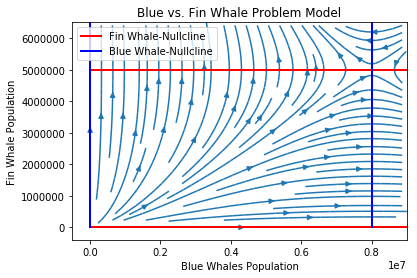

In [7]:
%matplotlib inline
#-------------------------------------------------------------------------------------------
# Creates the superimposed plot for stream plot of the model, as well as dB/dt = dF/dt =  0
#-------------------------------------------------------------------------------------------

# Part 1: Creates the length of the Blue Whale 
x, y = np.linspace(0, 9000000), np.linspace(0, 6500000)
X, Y = np.meshgrid(x, y)

# Part 2: The approximated points of the functions dB/dt, and dF/dt which we'll use for the plot.
U, V = dB_dt(X, Y), dF_dt(X, Y)

# Part 3: Creating the figure for the plot
fig, ax1 = plt.subplots()

# Part 4: Creating the plots for dB/dt = dF/dt = 0, the Nullclines

ax1.plot([0,9000000],[0,0], 'r-', lw=2, label='Fin Whale-Nullcline')
ax1.plot([0,9000000],[5000000,5000000], 'r-', lw=2)
ax1.plot([0,0],[6500000,0], 'b-', lw=2, label='Blue Whale-Nullcline')
ax1.plot([8000000,8000000],[6500000,0], 'b-', lw=2)

# Part 5: Sets the axis, and equilibrium information for the plot
ax1.set(title= 'Blue vs. Fin Whale Problem Model', xlabel= 'Blue Whales Population', 
        ylabel ='Fin Whale Population')
ax1.tick_params(axis='Blue Whale Population', labelcolor='r')
ax1.legend(loc= 'upper left')

# Part 6: Plots the streamplot which represents the vector plot.
ax1.streamplot(X, Y, U, V)

### Step 5: Answer the Question

* **Based on the graph, unstable at both equilibrium Points: (0,0); (8000000, 5000000)**
* But it's hard to really tell.

## Chapter 5.4 Question 1b: Whale Problem Revisited (via Eigenvalue Method)

### Step 1: List your variables and Assumptions

**Variables**

* $B = \text{number of Blue Whales}$  
* $g_B = \text{growth rate of the Blue Whale Population}$  
* $F = \text{number of Fin Whales}$  
* $g_F = \text{growth rate of the Fin Whale Population}$  

**Assumptions**

* $g_B = 0.05B$
* $g_F = 0.08$
* $cB = cF = \alpha BF; \alpha = 10^{-8}$
* $B, F\geq 0$


### Step 2: Select your modeling approach

* We'll evaluate the Tree Problem (non-linear dynamical system) using the Eigenvalue Method.
* The theory for this modeling approach is as follows:
    $$\space$$
    * We're given a dynamical system, $x' = f(x)$ where $x = (x_1, ....,x_n)$ is an element of the state space $S \subseteq R^N $ and $F = (f_1,...,f_n)$
    * A point, $X_0 \in S$, is an equilibrium point or steady state, if and only if, $F(x_0) = 0$
    * There's a theorem that states that an equilibrium point is asymptotically stable if the following matrix
    $$\space$$
    $$
   A=
  \left[{\begin{array}{ccc}
   \cfrac{\partial f_1}{x_1}x_0 & ... &\cfrac{\partial f_1}{x_n}x_0 \\
   \cfrac{\partial f_n}{x_1}x_0 & ... &\cfrac{\partial f_n}{x_n}x_0 \\
  \end{array} } \right]$$ 
  $$\space$$ 
    * has eigenvalues w/ all negative real parts. If any of the eigenvalues have a positive real part, the the equilibrium point is unstable. If there are no real parts then you have an inconclusive case.
    $$\space$$
    * The eigenvalue method is based on a linear approximation.
        * Even if  $x' = F(x)$ is not linear, we have the following: $$F(x) \approx A(x - x_0)$$
        $$\space$$
        * in the neighborhood of the equilibrium point.
        

### Step 3: Formulate your Model

* Basically we find the equilibrium points
* Then, we take partials of our two equations and evaluate at the equilibrium points 
* Then find $\det(A - \lambda I) = 0$
* If the eigenvalues have negative real parts the system is stable.

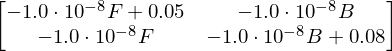

In [8]:
A_matrix = sp.Array([[sp.diff(dBdt, B), sp.diff(dBdt, F)], [sp.diff(dFdt, B), sp.diff(dFdt, F)]])
A_matrix

### Step 4: Solve your Model

* We evaluate the above matrix at the following equilibrium points:

$$(0.0, 0.0) \text{ and } (8000000.00000000, 5000000.00000000)$$

### Setting up the Matrix

In [9]:
solMatrix1 = np.array([[float(sp.diff(dBdt, B).subs({B:0, F:0})), 
                        float(sp.diff(dBdt, F).subs({B:0, F:0}))], 
                       [float(sp.diff(dFdt, B).subs({B:0, F:0})), 
                        float(sp.diff(dFdt, F).subs({B:0, F:0}))]])

solMatrix2 = np.array([[float(sp.diff(dBdt, B).subs({B:8000000, F:5000000})), 
                        float(sp.diff(dBdt, F).subs({B:8000000, F:5000000}))], 
                       [float(sp.diff(dFdt, B).subs({B:8000000, F:5000000})), 
                        float(sp.diff(dFdt, F).subs({B:8000000, F:5000000}))]])

### Step 5: Answer the Question

* No, there aren't any stable equilibrium points

**For $(B = 0, F = 0)$, both eigenvalues have positive real parts which make it unstable.**

In [10]:
sci.eigvals(solMatrix1)

array([0.05+0.j, 0.08+0.j])

**For $(B = 8000000, S = 5000000)$, one of the eigenvalues have a positive real part which makes it unstable.**

In [11]:
sci.eigvals(solMatrix2)

array([ 0.06324555+0.j, -0.06324555+0.j])

## Chapter 5.4 Question 1c | d | e: Whale Problem Revisited (via Phase Portrait)

#### Part C:

* The linear system that approximates the behavior of the continuous dynamical system for both equilibrium points are shown below:

**For $(B = 0, F = 0)$** 

In [46]:
solMatrix1

array([[0.05, 0.  ],
       [0.  , 0.08]])

**For $(B = 8000000, S = 5000000)$**

In [47]:
solMatrix2

array([[ 0.  , -0.08],
       [-0.05,  0.  ]])

* The general solution for the linear system is the following: 

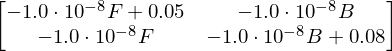

In [61]:
A_matrix

### Trajectory Lines Function

In [12]:
def plot_traj(ax1, g1, g2, x0, t, args=(), color='black', lw=2):
    """
    Plots a trajectory on a phase portrait.
    
    Parameters
    ----------
    ax : Matplotlib Axis instance
        Axis on which to make the plot
    g1 : A function
        One of the Differentials that define 
        the dynamical system.
    g2 : A function
        One of the Differentials that define 
        the dynamical system.
    x0 : array_like, shape (2,)
        Initial condition.
    t : array_like
        Time points for trajectory.
    args : tuple, default ()
        Additional arguments to be passed to f

    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    
    # Creates the set of points initialized by the parameter 'x'
    # for the difference equations g1 = -x1**3 - 4*x1 - x2; g2 = 3*x1
    def func(x,t):
        x_1 = x[0]
        x_2 = x[1]
        G1 = g1(x_1,x_2)
        G2 = g2(x_1,x_2)
        return [G1,G2]
    
    soln = scint.odeint(func, x0, t, args=args)
    ax1.plot(*soln.transpose(), color=color, lw=lw)
    return ax1 

### Phase Portrait

#### Part D:

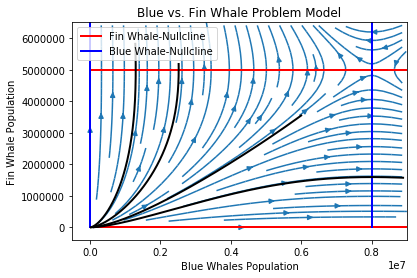

In [60]:
fig, ax1 = plt.subplots()

# Part 4: Creating the plots for dB/dt = dF/dt = 0, the Nullclines

ax1.plot([0,9000000],[0,0], 'r-', lw=2, label='Fin Whale-Nullcline')
ax1.plot([0,9000000],[5000000,5000000], 'r-', lw=2)
ax1.plot([0,0],[6500000,0], 'b-', lw=2, label='Blue Whale-Nullcline')
ax1.plot([8000000,8000000],[6500000,0], 'b-', lw=2)

# Part 5: Sets the axis, and equilibrium information for the plot
ax1.set(title= 'Blue vs. Fin Whale Problem Model', xlabel= 'Blue Whales Population', 
        ylabel ='Fin Whale Population')
ax1.tick_params(axis='Blue Whale Population', labelcolor='r')
ax1.legend(loc= 'upper left')

# Part 6: Plots the streamplot which represents the vector plot.
ax1.streamplot(X, Y, U, V)

points = [[40000,4000],[20000,3000],[99000,8000],[99000, 5000]]
t = np.linspace(0, 100, 5000)
for point in points:
    plot_traj(ax1, dB_dt, dF_dt, point, t)

#### Part E

* Based on the Phase Portrait we can determine that the equilibrium points are unstable. As for the current estimate it is likely that the Blue/Fin populations will not converge towards the equilibrium points. 